Names: (double-click to edit)

Usual python initializations

In [1]:
import math
import csv
import matplotlib.pyplot as plot

## Gaia data from the ESA

This is part of the Gaia data, release 2, which is stored as a csv file 
in my directory. The fields are documented at https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html . Think of this data set basically as a big table with 94 
columns. This code reads the file, and afterwards, prints out all 
of the column names (stored in an array called 'names'), the number 
of columns and the first column. 

In [18]:
gaia_data={}
with open('/home/jupyter-awsteiner/gaia1.csv') as csvfile:
    reader = csv.reader(csvfile)
    names=next(reader)
    for i in range(0,len(names)):
        gaia_data[names[i]]=[]
    for row in reader:
        for i in range(0,len(row)):
            if row[i] is not '':
                gaia_data[names[i]].append(row[i])                   
print('Column names:',names)
print('Number of columns:',len(names))
print('First column',names[0])

Column names: ['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error', 'mean_varpi_factor_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_

You can refer to any column with it's name, e.g.
<code>gaia_data["lum_val"]</code>. This next line
uses the <code>len()</code> function to print out the
number of rows in the <tt>lum_val</tt> column.


In [19]:
print(len(gaia_data["lum_val"]))

1438


## Histograms

A great way of looking at the data is to plot a histogram. 
However, many of the values in the columns are empty, so we
have to remove those empty values first. This little loop
copies all the non-empty values in the <tt>lum_val</tt> column and
puts them in an array (list) called <tt>temp</tt>. Notice
also that it has to convert the numbers in the table from
strings to "floating-point" numbers. Then, it
uses the <code>hist()</code> function to make a histogram.

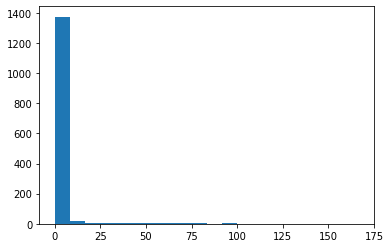

In [20]:
temp=[]
for i in range(0,len(gaia_data["lum_val"])):
    if gaia_data["lum_val"][i] is not '':
        temp.append(float(gaia_data["lum_val"][i]))
plot.hist(temp,bins=20)
plot.show()

<font color="red">Task 1: The all of the data is bunched over on the left-hand-side of the plot. How do we fix it?Use the space below to fix the histogram plot? (Hint: is there a mathematical function which you can apply to this line</font>

<code>temp.append(new_function(float(gaia_data["lum_val"][i])))</code>

<font color="red">to change the way the data are shaped in the plot?</font>

In [21]:
# Type code here

## Blackbody radiation

You can also get values for individual objects in the data set. 
Here are the temperature (in K), the luminosity (in units of
the solar luminosity) and radius (in units of the solar radius)
for the first row.

In [22]:
gaia_data["teff_val"][0]

'3874.0'

In [23]:
gaia_data["lum_val"][0]

'0.0801041'

In [24]:
gaia_data["radius_val"][0]

'0.5157089'

<font color="red">Task 2: Presuming a black body, use the temperature
and radius to obtain the luminosity (in units
of the solar luminosity) and compare it to
the value in the <tt>lum_val</tt>. Use python to do this
calculation in the line below. You may find it convenient
to create a new variable, e.g.</font>
    
<code>T=gaia_data["teff_val"][0]</code>

In [25]:
# Type code here

## Right ascension and declination

Here are histograms for the right ascension and declination 
(which are both given as angles in units of degrees)

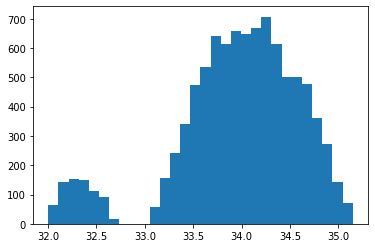

In [26]:
temp=[]
for i in range(0,len(gaia_data["ra"])):
    if gaia_data["ra"][i] is not '':
        temp.append(float(gaia_data["ra"][i]))
plot.hist(temp,bins=30)
plot.show()

In [ ]:
temp=[]
for i in range(0,len(gaia_data["dec"])):
    if gaia_data["dec"][i] is not '':
        temp.append(float(gaia_data["dec"][i]))
plot.hist(temp,bins=30)
plot.show()

<font color="red">Task 3: Where in the sky are most of the observations
in this data file located? The link below may help:</font>

https://www.visualcapitalist.com/wp-content/uploads/2019/07/star-map-full-res.html

Type your answer in this cell (double-click to edit).

## Parallax

This is the histogram of parallaxes (in milliarc seconds) from 
Gaia. 

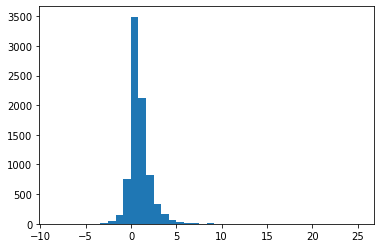

In [27]:
temp=[]
for i in range(0,len(gaia_data["parallax"])):
    if gaia_data["parallax"][i] is not '':
        temp.append(float(gaia_data["parallax"][i]))
plot.hist(temp,bins=40)
plot.show()

What is strange about this histogram?

In [ ]:
What is strange about this histogram

<font color="red">Task 4: Distances can be determined from parallax from
d (in pc) = 1/(parallax (in arcseconds)). In the cell below, construct a
histogram of distances by removing all of the objects with a zero
or negative parallax. You may need to edit the if statement, e.g. </font>

<code>if (gaia_data["parallax"][i] is not ''
          and (put_something_here)>0):</code>

In [29]:
# Your code here

<font color="red">Task 5: What is the minimum and maximum distance for objects in
the data set with a positive and non-zero parallax? Use the min() and max()
functions on the list you created in task 4.</font>

In [30]:
# Your code here

<font color="red">Task 6: Finally, compare the maximum distance to the size of the Milky Way.
I claim that Gaia is unlikely to be able to measure parallaxes for objects inside the 
Milky Way, so what does this mean?</font>

Type your answer here (double-click to edit).